# <b><u> Project Title : Sentiment Analysis : Weather Sentiment</u></b>

# Workflow

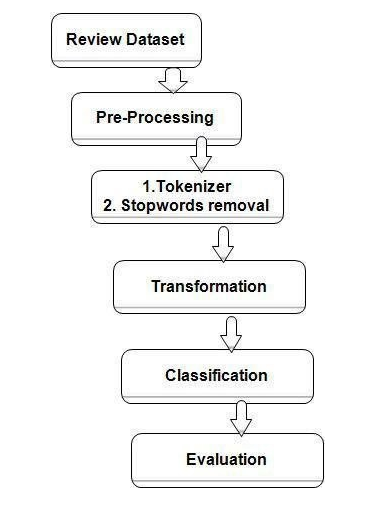

#**1.Importing Some Libraries.**

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
pip install pycaret

     |████████████████████████████████| 266kB 19.2MB/s 
     |████████████████████████████████| 245kB 42.4MB/s 
     |████████████████████████████████| 1.4MB 37.9MB/s 
     |████████████████████████████████| 1.7MB 35.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.2MB 316kB/s 
     |████████████████████████████████| 6.8MB 44.2MB/s 
     |████████████████████████████████| 174kB 46.6MB/s 
     |████████████████████████████████| 112kB 46.7MB/s 
     |████████████████████████████████| 2.0MB 39.2MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 276kB 40.0MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 1.1MB 45.4MB/s 
     |████████████████████████████████| 81kB 515kB/s 
     |████████████████████████████████| 3.2MB 31.6MB/

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from IPython.display import SVG

In [ ]:
df = pd.read_csv('/content/weather.csv')

# **2. Reviewing Our Dataset**

In [ ]:
df.head(5)

,_unit_id,_canary,_unit_state,_trusted_judgments,_last_judgment_at,what_emotion_does_the_author_express_specifically_about_the_weather,what_emotion_does_the_author_express_specifically_about_the_weather:confidence,gold_answer,tweet_id,tweet_text
0,314960380,NaN,finalized,20,8/24/13 0:21,Positive,0.8439,NaN,81990560,Grilling kabobs on the grill last night was am...
1,314960381,NaN,finalized,20,8/24/13 0:49,Negative,0.6963,NaN,84314377,The slowest day ever !! And the weather makes ...
2,314960382,NaN,finalized,20,8/24/13 0:55,Neutral / author is just sharing information,0.8802,NaN,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...
3,314960383,NaN,finalized,20,8/24/13 0:48,Positive,0.6897,NaN,82843785,Im going to lunch early today. The weather i...
4,314960384,NaN,finalized,20,8/24/13 1:19,Neutral / author is just sharing information,0.6153,NaN,82840144,Weekend Weather Causes Delays In I-270 Bridge ...


In [ ]:
# There are null values in location column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   _unit_id                                                                        1000 non-null   int64  
 1   _canary                                                                         0 non-null      float64
 2   _unit_state                                                                     1000 non-null   object 
 3   _trusted_judgments                                                              1000 non-null   int64  
 4   _last_judgment_at                                                               1000 non-null   object 
 5   what_emotion_does_the_author_express_specifically_about_the_weather             1000 non-null   object 
 6   what_emotion_does

In [ ]:
#dropping two columns that are _canary and gold_answer as they don't provide any info
df.drop(columns=['_canary','gold_answer'],axis=1,inplace=True)

In [ ]:
# There 1000 rows and 8 columns in our database
df.shape

(1000, 8)

In [ ]:
#renaming the column
df.rename(columns={'what_emotion_does_the_author_express_specifically_about_the_weather': 'Sentiment','what_emotion_does_the_author_express_specifically_about_the_weather:confidence':'confidence'}, inplace = True)

In [ ]:
# Names Of columns in our dataset
df.columns

Index(['_unit_id', '_unit_state', '_trusted_judgments', '_last_judgment_at',
       'Sentiment', 'confidence', 'tweet_id', 'tweet_text'],
      dtype='object')

In [ ]:
# There are 5 unique sentiment types in our dataset
df['Sentiment'].value_counts()

Negative                                        271
Neutral / author is just sharing information    261
Tweet not related to weather condition          235
Positive                                        231
I can't tell                                      2
Name: Sentiment, dtype: int64

In [ ]:
# dropping extra useless sentiments
index  = df[df.Sentiment == 'Tweet not related to weather condition'].index
index2 = df[df.Sentiment == "I can't tell"].index

In [ ]:
df.drop(index=index,inplace=True)
df.drop(index=index2,inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.shape

(763, 9)

In [ ]:
# now there are three categorical values of sentiments
df['Sentiment'].value_counts()

Negative                                        271
Neutral / author is just sharing information    261
Positive                                        231
Name: Sentiment, dtype: int64

In [ ]:
df.shape

(763, 9)

# Going deeper into tweet and sentiment.

In [ ]:
df["Sentiment"].replace('Neutral / author is just sharing information', "Neutral",inplace=True)

In [ ]:
df[df['Sentiment']=='Neutral']

,index,_unit_id,_unit_state,_trusted_judgments,_last_judgment_at,Sentiment,confidence,tweet_id,tweet_text
2,2,314960382,finalized,20,8/24/13 0:55,Neutral,0.8802,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...
4,4,314960384,finalized,20,8/24/13 1:19,Neutral,0.6153,82840144,Weekend Weather Causes Delays In I-270 Bridge ...
6,6,314960386,finalized,20,8/24/13 0:36,Neutral,0.5582,84313352,US GAS: Warm-Weather Forecasts Lift Natural Ga...
12,13,314960393,finalized,20,8/24/13 0:46,Neutral,0.8655,81996997,#WEATHER: 2:53 pm : 57.0F. Feels 56F. 30.10% ...
14,15,314960395,finalized,20,8/24/13 1:15,Neutral,0.7387,84319228,...SHOWERS AND THUNDERSTORMS MOVING SLOWLY OVE...
...,...,...,...,...,...,...,...,...,...
748,980,314961360,finalized,20,8/24/13 0:09,Neutral,0.6027,81993695,RT @mention: ...even the weather in OKC is #th...
751,983,314961363,finalized,20,8/24/13 0:10,Neutral,0.8767,80053403,#WEATHER: 8:52 pm C: 76.0F. Feels F. 29.76% Hu...
753,986,314961366,finalized,20,8/24/13 0:35,Neutral,0.5993,82675151,@mention it's cold outside
754,988,314961368,finalized,20,8/24/13 0:47,Neutral,0.8249,84051926,#WEATHER: 4:53 pm : 89.0F. Feels F. 29.72% Hu...


In [ ]:
pd.isnull(df["Sentiment"])

0      False
1      False
2      False
3      False
4      False
       ...  
758    False
759    False
760    False
761    False
762    False
Name: Sentiment, Length: 763, dtype: bool

# Heat Map for missing values

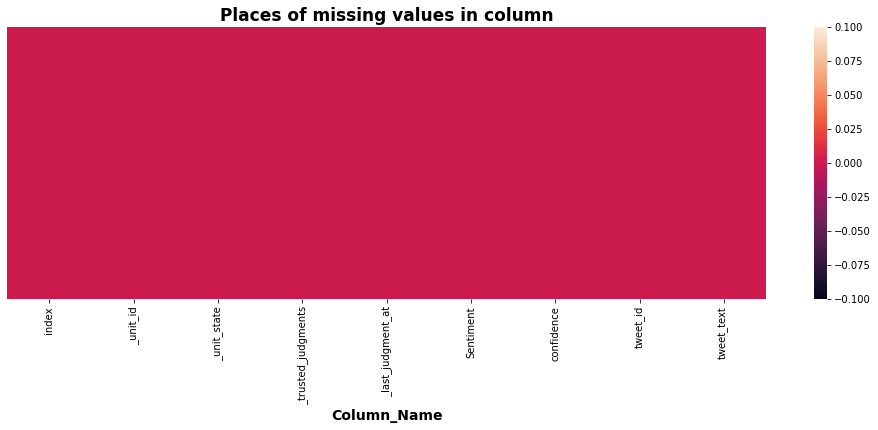

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

# no missing values

# Data Preprocessing

In [ ]:
corpus = []
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['tweet_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[0]

'grilling kabob grill last night amazing glad weather finally'

In [ ]:
## Applying Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,1))
X1= cv.fit_transform(corpus).toarray()
X1.shape

(763, 2177)

In [ ]:
cv.get_feature_names()

['aback',
 'abc',
 'ability',
 'able',
 'absolutely',
 'abt',
 'ac',
 'according',
 'accumulation',
 'across',
 'active',
 'activity',
 'actually',
 'add',
 'adopting',
 'advisory',
 'aere',
 'af',
 'affected',
 'afford',
 'afoot',
 'afraid',
 'afternoon',
 'age',
 'ago',
 'agree',
 'ahead',
 'ahh',
 'ahhh',
 'air',
 'airport',
 'alabama',
 'alarm',
 'album',
 'albuquerque',
 'alene',
 'alert',
 'allen',
 'allows',
 'allsmiles',
 'almost',
 'alone',
 'already',
 'alright',
 'also',
 'alt',
 'although',
 'always',
 'amador',
 'amazed',
 'amazing',
 'amazingly',
 'america',
 'american',
 'amgen',
 'amp',
 'andddd',
 'andrew',
 'angeles',
 'animal',
 'annoyed',
 'another',
 'antonio',
 'anyone',
 'anything',
 'anythng',
 'anyway',
 'ap',
 'apartment',
 'app',
 'appears',
 'approach',
 'approaching',
 'appropriate',
 'approve',
 'april',
 'apt',
 'aptargroup',
 'arch',
 'area',
 'argh',
 'army',
 'around',
 'arrived',
 'arsenal',
 'art',
 'article',
 'arwx',
 'as',
 'ash',
 'ask',
 'ass',


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X2 = tf.fit_transform(corpus).toarray()

In [ ]:
len(tf.get_feature_names())

2177

In [ ]:
y = df['Sentiment']
sentiment_ordering = ['Negative', 'Neutral', 'Positive']
y = y.apply(lambda x: sentiment_ordering.index(x))

In [ ]:
print(type(y))

<class 'pandas.core.series.Series'>


In [ ]:
from pycaret.classification import *
# useing this we can find the best model for classiciation

### Bag of Words Apporach

In [ ]:
X1=pd.DataFrame(X1)

In [ ]:
X1.shape

(763, 2177)

In [ ]:
X1['Sentiment']=y

In [ ]:
X1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,Sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# setup the model for countvectorizer aka bag of words
setup(data=X1,target='Sentiment')

,Description,Value
0,session_id,4740
1,Target,Sentiment
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(763, 2178)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,2177
8,Ordinal Features,False
9,High Cardinality Features,False


([('Setup Config',                                Description             Value
   0                               session_id              4740
   1                                   Target         Sentiment
   2                              Target Type        Multiclass
   3                            Label Encoded  0: 0, 1: 1, 2: 2
   4                            Original Data       (763, 2178)
   5                           Missing Values             False
   6                         Numeric Features                 0
   7                     Categorical Features              2177
   8                         Ordinal Features             False
   9                High Cardinality Features             False
   10                 High Cardinality Method              None
   11                   Transformed Train Set       (534, 1250)
   12                    Transformed Test Set       (229, 1250)
   13                      Shuffle Train-Test              True
   14                   

In [ ]:
compare_models(sort='F1',fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6908,0.8499,0.6883,0.7070,0.6876,0.5329,0.5405,1.8513
lr,Logistic Regression,0.6720,0.8456,0.6701,0.6877,0.6687,0.5055,0.5121,1.6287
ada,Ada Boost Classifier,0.6646,0.7623,0.6611,0.6894,0.6616,0.4928,0.5028,0.3000
ridge,Ridge Classifier,0.6649,0.0000,0.6628,0.6724,0.6591,0.4950,0.5011,0.0540
rf,Random Forest Classifier,0.6404,0.8121,0.6419,0.6544,0.6392,0.4604,0.4664,0.7347
et,Extra Trees Classifier,0.6329,0.8000,0.6336,0.6421,0.6298,0.4486,0.4542,0.7567
dt,Decision Tree Classifier,0.6216,0.7270,0.6223,0.6298,0.6187,0.4307,0.4351,0.0773
svm,SVM - Linear Kernel,0.6098,0.0000,0.6109,0.5872,0.5851,0.4134,0.4231,0.1493
lightgbm,Light Gradient Boosting Machine,0.5857,0.7783,0.5829,0.6001,0.5833,0.3751,0.3809,0.1860
nb,Naive Bayes,0.5506,0.6934,0.5539,0.5633,0.5380,0.3276,0.3395,0.0467


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4740, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
X=X1.iloc[:,0:-1]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        79
           1       0.83      0.78      0.81        88
           2       0.73      0.74      0.74        62

    accuracy                           0.76       229
   macro avg       0.76      0.76      0.76       229
weighted avg       0.76      0.76      0.76       229



In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[59  9 11]
 [13 69  6]
 [11  5 46]]


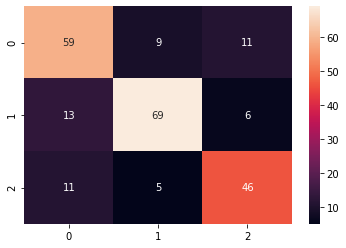

In [ ]:
sns.heatmap(cm,annot=True)

### Tf-IDF Apporach

In [ ]:
X2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X2=pd.DataFrame(X2)
X2.shape

(763, 2177)

In [ ]:
X2['Sentiment']=y
X2.shape

(763, 2178)

In [ ]:
X2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.429121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
setup(data=X2,target='Sentiment')

,Description,Value
0,session_id,5843
1,Target,Sentiment
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(763, 2178)"
5,Missing Values,False
6,Numeric Features,996
7,Categorical Features,1181
8,Ordinal Features,False
9,High Cardinality Features,False


([('Setup Config',                                Description             Value
   0                               session_id              5843
   1                                   Target         Sentiment
   2                              Target Type        Multiclass
   3                            Label Encoded  0: 0, 1: 1, 2: 2
   4                            Original Data       (763, 2178)
   5                           Missing Values             False
   6                         Numeric Features               996
   7                     Categorical Features              1181
   8                         Ordinal Features             False
   9                High Cardinality Features             False
   10                 High Cardinality Method              None
   11                   Transformed Train Set       (534, 1177)
   12                    Transformed Test Set       (229, 1177)
   13                      Shuffle Train-Test              True
   14                   

In [ ]:
compare_models(sort='F1',fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7135,0.8653,0.7126,0.7370,0.7135,0.5688,0.5780,0.8293
ridge,Ridge Classifier,0.7042,0.0000,0.7048,0.7172,0.7036,0.5552,0.5605,0.0527
gbc,Gradient Boosting Classifier,0.6740,0.8394,0.6728,0.6938,0.6740,0.5089,0.5166,1.8133
rf,Random Forest Classifier,0.6701,0.8381,0.6672,0.6913,0.6698,0.5023,0.5106,0.7073
et,Extra Trees Classifier,0.6664,0.8417,0.6639,0.6779,0.6639,0.4968,0.5026,0.7320
ada,Ada Boost Classifier,0.6331,0.7607,0.6262,0.6535,0.6259,0.4452,0.4581,0.2987
dt,Decision Tree Classifier,0.5746,0.6821,0.5699,0.5815,0.5689,0.3586,0.3643,0.0700
nb,Naive Bayes,0.5601,0.6974,0.5623,0.5747,0.5549,0.3423,0.3491,0.0553
lightgbm,Light Gradient Boosting Machine,0.5526,0.7456,0.5513,0.5636,0.5509,0.3281,0.3328,0.1693
lda,Linear Discriminant Analysis,0.5394,0.6819,0.5327,0.5410,0.5316,0.3042,0.3092,0.2987


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5843, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X=X2.iloc[:,0:-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        88
           1       0.79      0.77      0.78        71
           2       0.78      0.61      0.69        70

    accuracy                           0.74       229
   macro avg       0.75      0.74      0.74       229
weighted avg       0.75      0.74      0.74       229



In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[72  8  8]
 [12 55  4]
 [20  7 43]]


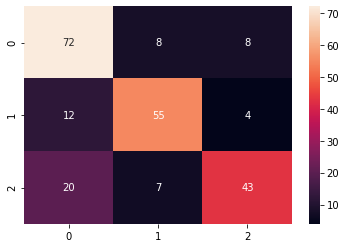

In [ ]:
sns.heatmap(cm,annot=True)